In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ceaning Dataset

In [ ]:
import os
import pandas as pd
from datetime import datetime

In [ ]:
base_path = '/content/drive/MyDrive/Final_Project/ACL19_Release'

In [ ]:
# Remove Audio Files from earnings call folders

for company_folder in os.listdir(base_path):
    full_path = os.path.join(base_path, company_folder)
    ceo_audio_folder = os.path.join(full_path, "CEO")

    if os.path.isdir(ceo_audio_folder):
        for file in os.listdir(ceo_audio_folder):
            if file.endswith(".mp3"):
                try:
                    os.remove(os.path.join(ceo_audio_folder, file))
                    print(f"Deleted: {file}")
                except Exception as e:
                    print(f"Error deleting {file}: {e}")

Streaming output truncated to the last 5000 lines.
Deleted: Patricia E. Yarrington_1_33.mp3
Deleted: Patricia E. Yarrington_1_14.mp3
Deleted: Patricia E. Yarrington_3_2.mp3
Deleted: Patricia E. Yarrington_1_23.mp3
Deleted: Patricia E. Yarrington_29_1.mp3
Deleted: Patricia E. Yarrington_3_7.mp3
Deleted: Patricia E. Yarrington_23_2.mp3
Deleted: Patricia E. Yarrington_4_1.mp3
Deleted: Patricia E. Yarrington_27_6.mp3
Deleted: Patricia E. Yarrington_11_1.mp3
Deleted: Patricia E. Yarrington_21_4.mp3
Deleted: Patricia E. Yarrington_3_6.mp3
Deleted: Patricia E. Yarrington_21_10.mp3
Deleted: Patricia E. Yarrington_29_3.mp3
Deleted: Patricia E. Yarrington_27_7.mp3
Deleted: Patricia E. Yarrington_1_9.mp3
Deleted: Patricia E. Yarrington_12_2.mp3
Deleted: Patricia E. Yarrington_2_5.mp3
Deleted: Patricia E. Yarrington_19_3.mp3
Deleted: Patricia E. Yarrington_29_13.mp3
Deleted: Patricia E. Yarrington_2_8.mp3
Deleted: Patricia E. Yarrington_28_1.mp3
Deleted: Patricia E. Yarrington_27_1.mp3
Deleted: Pa

In [ ]:
#Separate company from date

rows = []

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path):
        try:
            # Split into company and date
            company_name, date_str = folder.rsplit('_', 1)
            earnings_date = datetime.strptime(date_str, '%Y%m%d').date()

            # Read TextSequence.txt
            text_file = os.path.join(folder_path, "TextSequence.txt")
            if os.path.isfile(text_file):
                with open(text_file, 'r', encoding='utf-8') as f:
                    text = f.read().strip()
                    rows.append({
                        'Company_Name': company_name,
                        'Earnings_Call_Date': earnings_date,
                        'Text': text
                    })
        except Exception as e:
            print(f"Error processing {folder}: {e}")

# Save results to CSV
df = pd.DataFrame(rows)
df.to_csv("earnings_calls_cleaned.csv", index=False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Final_Project/earnings_calls_cleaned.csv", index=False)

In [ ]:
earnings_call_dataset = pd.read_csv('/content/drive/MyDrive/Final_Project/earnings_calls_cleaned.csv')

In [ ]:
earnings_call_dataset.head()

,Company_Name,Earnings_Call_Date,Text
0,Activision Blizzard,2017-02-09,"Thank you, Bobby\nDue to our portfolio strengt..."
1,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec..."
2,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ..."
3,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of..."
4,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll..."


In [ ]:
earnings_call_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        572 non-null    object
 1   Earnings_Call_Date  572 non-null    object
 2   Text                572 non-null    object
dtypes: object(3)
memory usage: 13.5+ KB


Adding Company Codes and Industries to Dataset

In [ ]:
!pip install fuzzywuzzy[speedup] pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.9 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import fuzz

fuzz.ratio('A.O. Smith Corp', 'A.O. Smith Corporation Common Stock')

60

In [ ]:
nasdaq_df = pd.read_csv('/content/drive/MyDrive/Final_Project/nasdaq_screener_1746290920721.csv')

# Clean the Name column
nasdaq_df['Name'] = nasdaq_df['Name'].str.replace('Common Stock', '', regex=False).str.strip()

nasdaq_df = nasdaq_df.drop(columns=['Last Sale', 'Net Change', '% Change', 'Market Cap', 'IPO Year', 'Volume'])

nasdaq_df.head(10)

,Symbol,Name,Country,Sector,Industry
0,A,Agilent Technologies Inc.,United States,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation,United States,Industrials,Aluminum
2,AACB,Artius II Acquisition Inc. Class A Ordinary Sh...,United States,NaN,NaN
3,AACBR,Artius II Acquisition Inc. Rights,United States,NaN,NaN
4,AACBU,Artius II Acquisition Inc. Units,United States,Finance,Blank Checks
5,AACG,ATA Creativity Global American Depositary Shares,China,Real Estate,Other Consumer Services
6,AACT,Ares Acquisition Corporation II Class A Ordina...,NaN,Finance,Blank Checks
7,AAL,American Airlines Group Inc.,United States,Consumer Discretionary,Air Freight/Delivery Services
8,AAM,AA Mission Acquisition Corp. Class A Ordinary ...,NaN,NaN,NaN
9,AAME,Atlantic American Corporation,United States,Finance,Life Insurance


In [ ]:
nasdaq_df.to_csv("/content/drive/MyDrive/Final_Project/nasdaq.csv", index=False)

In [ ]:
earnings_df = pd.read_csv('/content/drive/MyDrive/Final_Project/earnings_calls_cleaned.csv')
reference_df = pd.read_csv('/content/drive/MyDrive/Final_Project/nasdaq.csv')

In [ ]:
from fuzzywuzzy import process

# Clean company names
earnings_df['Company_Name_cleaned'] = earnings_df['Company_Name'].str.lower().str.strip()
reference_df['Name_cleaned'] = reference_df['Name'].str.lower().str.strip()

# Reference list of cleaned names
reference_names = reference_df['Name_cleaned'].tolist()

# Create match columns
matched_names = []
match_scores = []

# Fuzzy match each company in earnings_df
for name in earnings_df['Company_Name_cleaned']:
    match, score = process.extractOne(name, reference_names)
    if score >= 85:  # Strict threshold to prevent false positives
        matched_names.append(match)
        match_scores.append(score)
    else:
        matched_names.append(None)
        match_scores.append(None)

# Add match info to earnings_df
earnings_df['Matched_Name'] = matched_names
earnings_df['Match_Score'] = match_scores

# Merge only on high-confidence matches
merged_df = earnings_df.merge(
    reference_df,
    left_on='Matched_Name',
    right_on='Name_cleaned',
    how='left'
)

# Final selection
final_df = merged_df[[
    'Company_Name', 'Earnings_Call_Date', 'Text',
    'Symbol', 'Country', 'Sector', 'Industry', 'Match_Score'
]].rename(columns={'Symbol': 'Stock_Ticker'})


final_df.to_csv('/content/drive/MyDrive/Final_Project/enriched_earnings_calls.csv', index=False)

In [ ]:
final_df

NameError: name 'final_df' is not defined

Not receiving great results with fuzzy, attemptin TF-IDF vector similarities

In [ ]:
# Clean company name columns
import re

def clean_name(name):
    name = name.lower()
    name = re.sub(r'[^a-z0-9 ]', '', name)         # remove punctuation
    name = re.sub(r'\b(inc|co|corp|ltd|plc|llc)\b', '', name)  # remove suffixes
    return name.strip()

earnings_df['Company_Name_cleaned'] = earnings_df['Company_Name'].apply(clean_name)
reference_df['Name_cleaned'] = reference_df['Name'].apply(clean_name)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fit TF-IDF on both sets of names
vectorizer = TfidfVectorizer().fit(earnings_df['Company_Name_cleaned'].tolist() + reference_df['Name_cleaned'].tolist())

earnings_vecs = vectorizer.transform(earnings_df['Company_Name_cleaned'])
reference_vecs = vectorizer.transform(reference_df['Name_cleaned'])

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(earnings_vecs, reference_vecs)
best_match_idx = np.argmax(similarity_matrix, axis=1)
best_scores = similarity_matrix[np.arange(len(earnings_df)), best_match_idx]

# Match only if similarity score is high enough
matched_names = []
for i, score in enumerate(best_scores):
    if score > 0.85:  # tighten this threshold
        matched_names.append(reference_df.iloc[best_match_idx[i]]['Name_cleaned'])
    else:
        matched_names.append(None)

earnings_df['Matched_Name'] = matched_names

In [ ]:
merged_df = earnings_df.merge(reference_df, left_on='Matched_Name', right_on='Name_cleaned', how='left')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company_Name          572 non-null    object
 1   Earnings_Call_Date    572 non-null    object
 2   Text                  572 non-null    object
 3   Company_Name_cleaned  572 non-null    object
 4   Matched_Name          405 non-null    object
 5   Symbol                405 non-null    object
 6   Name                  405 non-null    object
 7   Country               404 non-null    object
 8   Sector                405 non-null    object
 9   Industry              405 non-null    object
 10  Name_cleaned          405 non-null    object
dtypes: object(11)
memory usage: 49.3+ KB


In [ ]:
df_view = merged_df.drop(columns=['Text'])

df_view

,Company_Name,Earnings_Call_Date,Company_Name_cleaned,Matched_Name,Symbol,Name,Country,Sector,Industry,Name_cleaned
0,Activision Blizzard,2017-02-09,activision blizzard,None,NaN,NaN,NaN,NaN,NaN,NaN
1,AbbVie Inc.,2017-07-28,abbvie,abbvie,ABBV,AbbVie Inc.,United States,Health Care,Biotechnology: Pharmaceutical Preparations,abbvie
2,Abbott Laboratories,2017-10-18,abbott laboratories,abbott laboratories,ABT,Abbott Laboratories,United States,Health Care,Biotechnology: Pharmaceutical Preparations,abbott laboratories
3,A.O. Smith Corp,2017-07-26,ao smith,ao smith corporation,AOS,A.O. Smith Corporation,United States,Consumer Discretionary,Consumer Electronics/Appliances,ao smith corporation
4,3M Company,2017-04-25,3m company,3m company,MMM,3M Company,United States,Health Care,Medical/Dental Instruments,3m company
...,...,...,...,...,...,...,...,...,...,...
567,Xerox,2017-04-25,xerox,xerox holdings corporation,XRX,Xerox Holdings Corporation,United States,Technology,Computer peripheral equipment,xerox holdings corporation
568,Xilinx,2017-04-26,xilinx,None,NaN,NaN,NaN,NaN,NaN,NaN
569,WestRock,2017-11-02,westrock,None,NaN,NaN,NaN,NaN,NaN,NaN
570,Yum! Brands Inc,2017-08-03,yum brands,yum brands,YUM,Yum! Brands Inc.,United States,Consumer Discretionary,Restaurants,yum brands


In [ ]:
merged_df = merged_df.drop(columns=['Company_Name_cleaned', 'Matched_Name', 'Name', 'Name_cleaned'])

In [ ]:
merged_df = merged_df.rename(columns={'Symbol': 'Stock_Ticker'})

In [ ]:
merged_df = merged_df.dropna()

merged_df

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry
0,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
1,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ...",ABT,United States,Health Care,Biotechnology: Pharmaceutical Preparations
2,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of...",AOS,United States,Consumer Discretionary,Consumer Electronics/Appliances
3,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments
4,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
...,...,...,...,...,...,...,...
399,Xcel Energy Inc,2017-07-27,"Thanks, Ben, and good morning, everyone\nWe re...",XEL,United States,Utilities,Power Generation
400,Xerox,2017-08-01,"Thanks, Jeff, and good morning everyone\nI wil...",XRX,United States,Technology,Computer peripheral equipment
401,Xerox,2017-04-25,"Thanks, Jeff\nBefore diving into quarter one r...",XRX,United States,Technology,Computer peripheral equipment
402,Yum! Brands Inc,2017-08-03,"Thank you, Keith, and good morning, everyone\n...",YUM,United States,Consumer Discretionary,Restaurants


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Final_Project/enriched_earnings_calls.csv', index=False)

In [ ]:
unique_count = merged_df['Company_Name'].nunique()
print(f"Number of unique companies: {unique_count}")

Number of unique companies: 193


In [ ]:
company_counts = merged_df['Company_Name'].value_counts()
print(company_counts)

Company_Name
Automatic Data Processing    4
Ecolab Inc.                  4
Avery Dennison Corp          4
Archer-Daniels-Midland Co    4
Caterpillar Inc.             4
                            ..
Tyson Foods                  1
Ventas Inc                   1
Western Digital              1
Walmart                      1
Welltower Inc.               1
Name: count, Length: 193, dtype: int64


In [ ]:
company_counts_df = company_counts.reset_index()
company_counts_df.columns = ['Company_Name', 'Row_Count']
company_counts_df

,Company_Name,Row_Count
0,Automatic Data Processing,4
1,Ecolab Inc.,4
2,Avery Dennison Corp,4
3,Archer-Daniels-Midland Co,4
4,Caterpillar Inc.,4
...,...,...
188,Tyson Foods,1
189,Ventas Inc,1
190,Western Digital,1
191,Walmart,1


In [ ]:
valid_companies = company_counts[company_counts >= 2].index

filtered_df = merged_df[merged_df['Company_Name'].isin(valid_companies)]

filtered_df

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry
1,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
4,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments
5,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
6,AbbVie Inc.,2017-04-27,Today I'll highlight recent pipeline updates a...,ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
9,3M Company,2017-07-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments
...,...,...,...,...,...,...,...
565,Xcel Energy Inc,2017-07-27,"Thanks, Ben, and good morning, everyone\nWe re...",XEL,United States,Utilities,Power Generation
566,Xerox,2017-08-01,"Thanks, Jeff, and good morning everyone\nI wil...",XRX,United States,Technology,Computer peripheral equipment
567,Xerox,2017-04-25,"Thanks, Jeff\nBefore diving into quarter one r...",XRX,United States,Technology,Computer peripheral equipment
570,Yum! Brands Inc,2017-08-03,"Thank you, Keith, and good morning, everyone\n...",YUM,United States,Consumer Discretionary,Restaurants


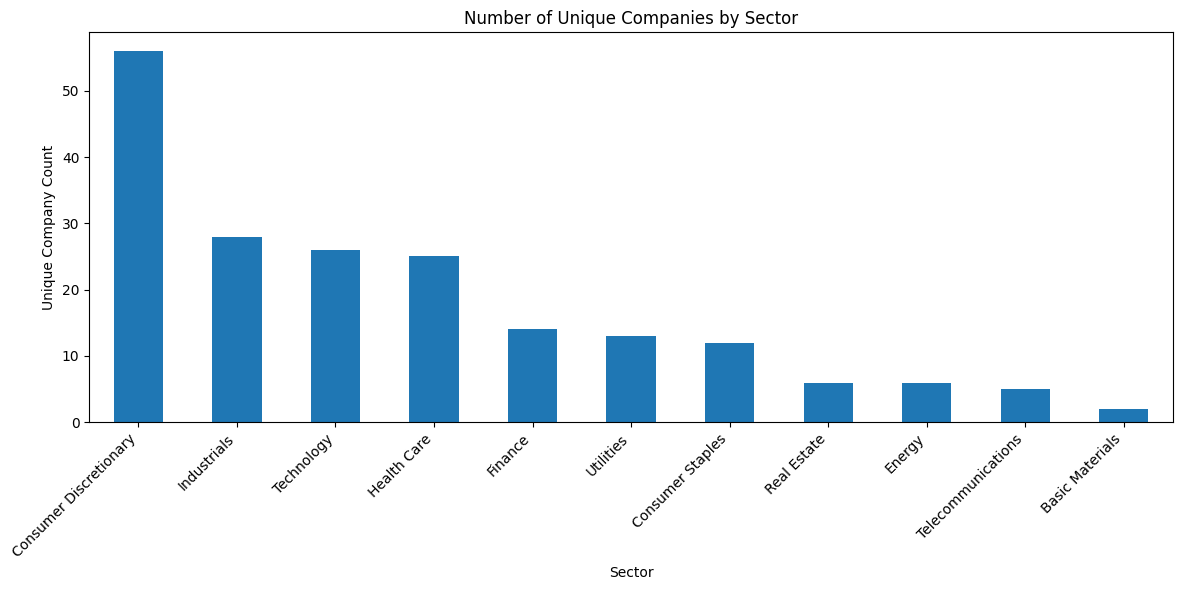

In [ ]:
import matplotlib.pyplot as plt

# Count unique companies by sector
companies_by_sector = merged_df.groupby('Sector')['Company_Name'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
companies_by_sector.plot(kind='bar')
plt.title('Number of Unique Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Unique Company Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Retreive Stock Data

In [ ]:
!pip install yfinance
!pip install yfinance tqdm

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Final_Project/enriched_earnings_calls.csv')

merged_df

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry
0,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
1,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ...",ABT,United States,Health Care,Biotechnology: Pharmaceutical Preparations
2,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of...",AOS,United States,Consumer Discretionary,Consumer Electronics/Appliances
3,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments
4,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
...,...,...,...,...,...,...,...
399,Xcel Energy Inc,2017-07-27,"Thanks, Ben, and good morning, everyone\nWe re...",XEL,United States,Utilities,Power Generation
400,Xerox,2017-08-01,"Thanks, Jeff, and good morning everyone\nI wil...",XRX,United States,Technology,Computer peripheral equipment
401,Xerox,2017-04-25,"Thanks, Jeff\nBefore diving into quarter one r...",XRX,United States,Technology,Computer peripheral equipment
402,Yum! Brands Inc,2017-08-03,"Thank you, Keith, and good morning, everyone\n...",YUM,United States,Consumer Discretionary,Restaurants


In [ ]:
import yfinance as yf
ticker = yf.Ticker("ABBV")
hist = ticker.history(start="2017-07-20", end="2017-08-01")
print(hist)

                                Open       High        Low      Close  \
Date                                                                    
2017-07-20 00:00:00-04:00  52.305434  53.186868  52.269607  53.036381   
2017-07-21 00:00:00-04:00  53.014867  53.774473  52.921704  53.480659   
2017-07-24 00:00:00-04:00  53.480658  53.566653  52.914535  52.964703   
2017-07-25 00:00:00-04:00  53.315841  53.423333  51.932782  51.968609   
2017-07-26 00:00:00-04:00  51.861138  52.090453  51.560157  52.018787   
2017-07-27 00:00:00-04:00  52.154934  52.169270  50.793373  51.402496   
2017-07-28 00:00:00-04:00  51.338000  51.911291  49.718458  50.478069   
2017-07-31 00:00:00-04:00  50.535394  50.578395  50.040936  50.098267   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-07-20 00:00:00-04:00  5329700        0.0           0.0  
2017-07-21 00:00:00-04:00  4961500        0.0           0.0  
2017-07-24 00:00:00-0

In [ ]:
from datetime import timedelta
import yfinance as yf
import pandas as pd
import time

records = []

for idx, row in merged_df.iterrows():
    ticker = row['Stock_Ticker']
    call_date = pd.to_datetime(row['Earnings_Call_Date'])

    if pd.notnull(ticker) and pd.notnull(call_date):
        try:
            start = call_date - timedelta(days=5)
            end = call_date + timedelta(days=5)
            data = yf.download(ticker, start=start, end=end, progress=False)

            if not data.empty:
                for date, row_data in data.iterrows():
                    records.append({
                        'Ticker': ticker,
                        'Call_Date': call_date.date(),
                        'Price_Date': date.date(),
                        'Close': row_data['Close']
                    })
            time.sleep(1)
        except Exception as e:
            print(f"[{ticker} on {call_date}] Failed: {e}")

In [ ]:
price_df = pd.DataFrame(records)

In [ ]:
import re

def use_regex(input_text):
    input_text = str(input_text)  # ensure it's a string
    pattern = re.compile(r"[0-9]*\.[0-9]+")
    match = pattern.search(input_text)
    if match:
        return float(match.group(0))
    else:
        return None

In [ ]:
price_df['Close_Clean'] = price_df['Close'].apply(use_regex)

In [ ]:
price_df.drop(columns=['Close'], inplace=True)

In [ ]:
price_df.to_csv('/content/drive/MyDrive/Final_Project/stock_price_data.csv', index=False)

In [ ]:
price_df = pd.read_csv('/content/drive/MyDrive/Final_Project/stock_price_data.csv')

In [ ]:
price_df.head()

,Ticker,Call_Date,Price_Date,Close_Clean
0,ABBV,2017-07-28,2017-07-24,52.964703
1,ABBV,2017-07-28,2017-07-25,51.968616
2,ABBV,2017-07-28,2017-07-26,52.018784
3,ABBV,2017-07-28,2017-07-27,51.402481
4,ABBV,2017-07-28,2017-07-28,50.478077


In [ ]:
import pandas as pd

# Convert dates
price_df['Call_Date'] = pd.to_datetime(price_df['Call_Date'])
price_df['Price_Date'] = pd.to_datetime(price_df['Price_Date'])

metrics = []

# Group by ticker and call date
grouped = price_df.groupby(['Ticker', 'Call_Date'])

for (ticker, call_date), group in grouped:
    group = group.sort_values('Price_Date')

    # Pre- and post-call windows
    pre_call = group[group['Price_Date'] < call_date]
    post_call_inclusive = group[group['Price_Date'] >= call_date]

    price_change_1d = None
    volatility_3d = None
    avg_change = None

    # 1-day price change
    if not pre_call.empty and len(post_call_inclusive) >= 2:
        try:
            pre_close = pre_call.iloc[-1]['Close_Clean']
            post_close = post_call_inclusive.iloc[1]['Close_Clean']
            price_change_1d = (post_close - pre_close) / pre_close
        except:
            pass

    # Volatility (first 3 trading days including call)
    try:
        post_returns = post_call_inclusive['Close_Clean'].pct_change().dropna()
        volatility_3d = post_returns.head(3).std()
    except:
        pass

    # Average price change (3 pre vs 3 post incl. call)
    try:
        avg_pre_prices = pre_call['Close_Clean'].tail(3)
        avg_post_prices = post_call_inclusive['Close_Clean'].head(3)

        if len(avg_pre_prices) >= 2 and len(avg_post_prices) >= 2:
            avg_pre = avg_pre_prices.mean()
            avg_post = avg_post_prices.mean()
            avg_change = (avg_post - avg_pre) / avg_pre
    except:
        pass

    metrics.append({
        'Stock_Ticker': ticker,
        'Earnings_Call_Date': call_date,
        'Price_Change_1d': price_change_1d,
        'Volatility_2d': volatility_3d,
        'Avg_Price_Change': avg_change
    })

price_metrics_df = pd.DataFrame(metrics)

In [ ]:
price_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stock_Ticker        404 non-null    object        
 1   Earnings_Call_Date  404 non-null    datetime64[ns]
 2   Price_Change_1d     404 non-null    float64       
 3   Volatility_2d       397 non-null    float64       
 4   Avg_Price_Change    404 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 15.9+ KB


Preprocessing Earnings Calls

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, names
import string

# One-time downloads
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('names')

# Initialize components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Remove names
name_list = set([name.lower() for name in names.words()])

# Add custom stopwords
custom_stopwords = set(['quarter', 'guidance', 'call', 'fiscal', 'update', 'thank', 'thanks', 'questions', 'indiscernible', 'inaudible', 'okay', 'today', 'year', 'wa', 'think', 'million', 'billion', 'one', 'two', 'three', 'well', 'would', 'weve', 'going', 'really'])
stop_words.update(custom_stopwords)

# Acronym mapping
acronym_map = {
    'eps': 'earnings_per_share',
    'gaap': 'accounting_standard',
    'ebit': 'operating_income'
}

def my_preprocessor(text):
    # Lowercase and remove known tags
    text = text.lower()
    text = re.sub(r'\[.*?technical difficulty.*?\]', '', text, flags=re.IGNORECASE)

    # Remove numbers, punctuation, and special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Replace acronyms
    tokens = [acronym_map.get(token, token) for token in tokens]

    # Remove short workds
    tokens = [token for token in tokens if len(token) > 2]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Remove common names
    tokens = [token for token in tokens if token not in name_list]

    # Return clean string
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Final_Project/enriched_earnings_calls_processed.csv', index=False)

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Final_Project/enriched_earnings_calls_processed.csv')

In [ ]:
merged_df

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry
0,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
1,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ...",ABT,United States,Health Care,Biotechnology: Pharmaceutical Preparations
2,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of...",AOS,United States,Consumer Discretionary,Consumer Electronics/Appliances
3,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments
4,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations
...,...,...,...,...,...,...,...
399,Xcel Energy Inc,2017-07-27,"Thanks, Ben, and good morning, everyone\nWe re...",XEL,United States,Utilities,Power Generation
400,Xerox,2017-08-01,"Thanks, Jeff, and good morning everyone\nI wil...",XRX,United States,Technology,Computer peripheral equipment
401,Xerox,2017-04-25,"Thanks, Jeff\nBefore diving into quarter one r...",XRX,United States,Technology,Computer peripheral equipment
402,Yum! Brands Inc,2017-08-03,"Thank you, Keith, and good morning, everyone\n...",YUM,United States,Consumer Discretionary,Restaurants


Topic Modelling

Attempting LDA First

In [ ]:
!pip uninstall -y smart_open
!pip install --upgrade smart_open
!pip install --upgrade gensim

Found existing installation: smart-open 7.1.0
Uninstalling smart-open-7.1.0:
  Successfully uninstalled smart-open-7.1.0
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)


In [ ]:
!pip install --upgrade gensim
!pip install smart_open==5.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: smart_open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Step 1: TF-IDF vectorization
vectorizer = TfidfVectorizer(preprocessor=my_preprocessor, max_features=5000)
count_matrix = vectorizer.fit_transform(merged_df['Text'])

# Step 2: Try different topic counts
topic_models = {}
for num_topics in [3, 4, 5, 6]:
    print(f"Training LDA with {num_topics} topics...")

    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        learning_method='online',
        random_state=42,
        max_iter=10
    )
    lda_model.fit(count_matrix)

    # Store the model
    topic_models[num_topics] = lda_model

    # Evaluate using log perplexity
    perplexity = lda_model.perplexity(count_matrix)
    print(f"Perplexity for {num_topics} topics: {perplexity:.2f}")

    # Print top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        print(f"Topic {idx}: {', '.join(top_words)}")
    print("\n" + "-"*60 + "\n")

Training LDA with 3 topics...
Perplexity for 3 topics: 6668.79
Topic 0: patient, business, growth, corporate, slide, share, also, bit, earnings, study
Topic 1: growth, business, revenue, sale, customer, market, first, continue, cost, thats
Topic 2: growth, business, brand, customer, market, store, sale, new, thats, ha

------------------------------------------------------------

Training LDA with 4 topics...
Perplexity for 4 topics: 7620.30
Topic 0: patient, beauty, nktr, growth, business, brand, study, also, ha, program
Topic 1: growth, business, revenue, sale, customer, market, first, continue, cost, thats
Topic 2: growth, business, brand, sale, store, market, revenue, customer, thats, product
Topic 3: revenue, business, customer, share, operating, sale, growth, eqt, continue, wed

------------------------------------------------------------

Training LDA with 5 topics...
Perplexity for 5 topics: 8552.32
Topic 0: patient, valve, ebitda, growth, fourth, dispensing, business, opdivo, 

In [ ]:
best_num_topics = 4  # Higher perplexity score than 3, but slightly more diversity in topics

lda_model = LatentDirichletAllocation(n_components=best_num_topics,
                                           learning_method='online',
                                           random_state=42,
                                           max_iter=10)

# Fit the model with count matrix
lda_best = lda_model.fit_transform(count_matrix)

In [ ]:
!pip install pyLDAvis
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.lda_model as sklearnvis

pyLDAvis.enable_notebook()
vis_data = sklearnvis.prepare(lda_model, count_matrix, vectorizer)
pyLDAvis.display(vis_data)

Now seeing if SBERT improves results

In [ ]:
!pip install --upgrade pip

# Reinstall numpy first
!pip install --force-reinstall numpy==1.24.4

# Then reinstall scipy to match numpy
!pip install --force-reinstall scipy==1.10.1

# Then reinstall BERTopic cleanly
!pip install --force-reinstall bertopic

# Also reinstall sentence-transformers just in case
!pip install --force-reinstall sentence-transformers

^C
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: Operation cancelled by user
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
ERROR: Operation cancelled by user
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached hdbscan-0.8.40-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
ERROR: Operation cancelled by user
^C
^C


In [ ]:
!pip install numpy==1.26.4 --upgrade --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

docs = merged_df['Text']  # Avoid issues with NaNs

sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Compute embeddings (with progress bar)
sbert_embeddings = sbert_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

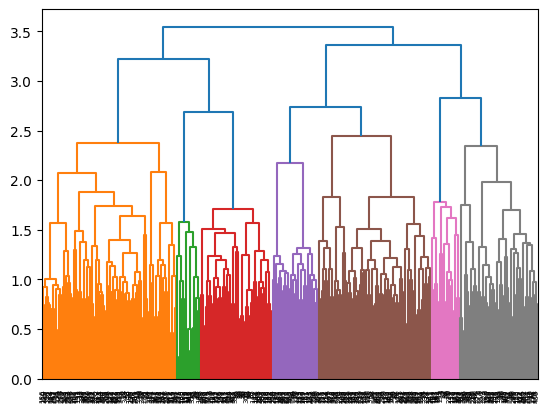

In [ ]:
import scipy.cluster.hierarchy as sc
import matplotlib.pyplot as plt

sc.dendrogram(sc.linkage(sbert_embeddings, method='ward'))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

for k in range(3, 7):  # Try different cluster numbers
    my_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    SBERT_cluster_labels = my_clustering.fit_predict(sbert_embeddings)
    score = silhouette_score(sbert_embeddings, SBERT_cluster_labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Clusters: 3, Silhouette Score: 0.0282
Clusters: 4, Silhouette Score: 0.0160
Clusters: 5, Silhouette Score: 0.0220
Clusters: 6, Silhouette Score: 0.0246


In [ ]:
from sklearn.cluster import KMeans

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    SBERT_cluster_labels_kmeans = kmeans.fit_predict(sbert_embeddings)
    score = silhouette_score(sbert_embeddings, SBERT_cluster_labels_kmeans)
    print(f"K-Means Clusters: {k}, Silhouette Score: {score:.4f}")

K-Means Clusters: 3, Silhouette Score: 0.0348
K-Means Clusters: 4, Silhouette Score: 0.0322
K-Means Clusters: 5, Silhouette Score: 0.0346
K-Means Clusters: 6, Silhouette Score: 0.0351


USE Model

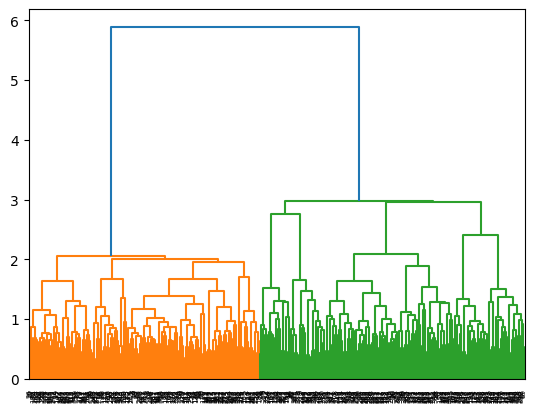

In [ ]:
import tensorflow_hub as hub

use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

use_embeddings = use_model(docs)

sc.dendrogram(sc.linkage(use_embeddings, method='ward'))
plt.show()

In [ ]:
for k in range(3, 7):  # Try different cluster numbers
    my_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    USE_cluster_labels = my_clustering.fit_predict(use_embeddings)
    score = silhouette_score(use_embeddings, USE_cluster_labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Clusters: 3, Silhouette Score: 0.0967
Clusters: 4, Silhouette Score: 0.0934
Clusters: 5, Silhouette Score: 0.1017
Clusters: 6, Silhouette Score: 0.0927


In [ ]:
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    USE_cluster_labels_kmeans = kmeans.fit_predict(use_embeddings)
    score = silhouette_score(use_embeddings, USE_cluster_labels_kmeans)
    print(f"K-Means Clusters: {k}, Silhouette Score: {score:.4f}")

K-Means Clusters: 3, Silhouette Score: 0.1011
K-Means Clusters: 4, Silhouette Score: 0.0923
K-Means Clusters: 5, Silhouette Score: 0.1014
K-Means Clusters: 6, Silhouette Score: 0.0564


In [ ]:
kmean_best = KMeans(n_clusters=5, random_state=42)
best_cluster_labels = kmeans.fit_predict(use_embeddings)

Adding USE and LDA Topics to merged_df

In [ ]:
merged_df['USE_Topic'] = best_cluster_labels

for i in range(lda_best.shape[1]):
    merged_df[f'LDA_Topic_{i}'] = lda_best[:, i]

merged_df

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry,USE_Topic,LDA_Topic_0,LDA_Topic_1,LDA_Topic_2,LDA_Topic_3
0,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations,0,0.021780,0.934658,0.021785,0.021778
1,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ...",ABT,United States,Health Care,Biotechnology: Pharmaceutical Preparations,4,0.012949,0.961147,0.012953,0.012951
2,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of...",AOS,United States,Consumer Discretionary,Consumer Electronics/Appliances,0,0.021935,0.934190,0.021939,0.021935
3,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments,2,0.015857,0.952428,0.015859,0.015857
4,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations,3,0.019758,0.940741,0.019752,0.019749
...,...,...,...,...,...,...,...,...,...,...,...,...
399,Xcel Energy Inc,2017-07-27,"Thanks, Ben, and good morning, everyone\nWe re...",XEL,United States,Utilities,Power Generation,0,0.019065,0.942802,0.019067,0.019066
400,Xerox,2017-08-01,"Thanks, Jeff, and good morning everyone\nI wil...",XRX,United States,Technology,Computer peripheral equipment,2,0.013493,0.959520,0.013494,0.013493
401,Xerox,2017-04-25,"Thanks, Jeff\nBefore diving into quarter one r...",XRX,United States,Technology,Computer peripheral equipment,2,0.014953,0.955140,0.014954,0.014953
402,Yum! Brands Inc,2017-08-03,"Thank you, Keith, and good morning, everyone\n...",YUM,United States,Consumer Discretionary,Restaurants,1,0.019720,0.940838,0.019722,0.019720


Sentiment Analysis

In [ ]:
!pip install transformers
!pip install -U sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load FinBERT (Prosus version fine-tuned on financial text)
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
def get_finbert_sentiment(text):
    try:
        inputs = tokenizer(text[:512], return_tensors="pt", truncation=True)
        with torch.no_grad():
            logits = model(**inputs).logits
        scores = softmax(logits.numpy()[0])
        return {
            'FinBERT_Positive': scores[0],
            'FinBERT_Neutral': scores[1],
            'FinBERT_Negative': scores[2],
            'FinBERT_Polarity': scores[0] - scores[2]  # Positive - Negative
        }
    except:
        return {
            'FinBERT_Positive': None,
            'FinBERT_Neutral': None,
            'FinBERT_Negative': None,
            'FinBERT_Polarity': None
        }

In [ ]:
sentiment_scores = merged_df['Text'].apply(get_finbert_sentiment)
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Merge back into merged_df
merged_df = pd.concat([merged_df, sentiment_df], axis=1)

Merge all data together now

In [ ]:
# Ensure date format matches
merged_df['Earnings_Call_Date'] = pd.to_datetime(merged_df['Earnings_Call_Date'])

# Merge on Stock_Ticker and Earnings_Call_Date
merged_df = merged_df.merge(
    price_metrics_df,
    how='left',
    on=['Stock_Ticker', 'Earnings_Call_Date']
)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company_Name        404 non-null    object        
 1   Earnings_Call_Date  404 non-null    datetime64[ns]
 2   Text                404 non-null    object        
 3   Stock_Ticker        404 non-null    object        
 4   Country             404 non-null    object        
 5   Sector              404 non-null    object        
 6   Industry            404 non-null    object        
 7   USE_Topic           404 non-null    int32         
 8   LDA_Topic_0         404 non-null    float64       
 9   LDA_Topic_1         404 non-null    float64       
 10  LDA_Topic_2         404 non-null    float64       
 11  LDA_Topic_3         404 non-null    float64       
 12  FinBERT_Positive    404 non-null    float32       
 13  FinBERT_Neutral     404 non-null    float32       

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Final_Project/final_earnings_calls.csv', index=False)

Seeing how the USE Model predicts topics

In [ ]:
industry_labels = pd.get_dummies(merged_df['Sector'])
merged_with_labels = pd.concat([merged_df, industry_labels], axis=1)

In [ ]:
topic_to_label = {}

# Loop through each USE topic and assign the most frequent industry
for topic in merged_with_labels['USE_Topic'].unique():
    temp_df = merged_with_labels[merged_with_labels['USE_Topic'] == topic]
    most_common_label = temp_df[industry_labels.columns].sum().idxmax()
    topic_to_label[topic] = most_common_label

print("Assigned Topics to Industry:", topic_to_label)

Assigned Topics to Industry: {np.int64(0): 'Consumer Discretionary', np.int64(4): 'Consumer Discretionary', np.int64(2): 'Consumer Discretionary', np.int64(3): 'Health Care', np.int64(5): 'Technology', np.int64(1): 'Consumer Discretionary'}


In [ ]:
merged_with_labels['Predicted_Industry'] = merged_with_labels['USE_Topic'].map(topic_to_label)

In [ ]:
from sklearn.metrics import classification_report

true_labels = merged_with_labels[industry_labels.columns].idxmax(axis=1)
predicted_labels = merged_with_labels['Predicted_Industry']

print(classification_report(true_labels, predicted_labels))

                        precision    recall  f1-score   support

       Basic Materials       0.00      0.00      0.00         2
Consumer Discretionary       0.36      0.96      0.52       118
      Consumer Staples       0.00      0.00      0.00        26
                Energy       0.00      0.00      0.00        13
               Finance       0.00      0.00      0.00        23
           Health Care       0.40      0.34      0.37        50
           Industrials       0.00      0.00      0.00        62
           Real Estate       0.00      0.00      0.00         8
            Technology       0.57      0.41      0.48        61
    Telecommunications       0.00      0.00      0.00        13
             Utilities       0.00      0.00      0.00        28

              accuracy                           0.38       404
             macro avg       0.12      0.16      0.12       404
          weighted avg       0.24      0.38      0.27       404



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Analysis

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Final_Project/final_earnings_calls.csv')

In [ ]:
merged_df[['FinBERT_Polarity', 'Price_Change_1d', 'Volatility_2d', 'Avg_Price_Change']].corr()

,FinBERT_Polarity,Price_Change_1d,Volatility_2d,Avg_Price_Change
FinBERT_Polarity,1.000000,0.013169,0.040867,0.020669
Price_Change_1d,0.013169,1.000000,-0.000411,0.954056
Volatility_2d,0.040867,-0.000411,1.000000,0.003788
Avg_Price_Change,0.020669,0.954056,0.003788,1.000000


Test on Price Volatility

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

merged_df['High_Volatility'] = merged_df['Volatility_2d'] > merged_df['Volatility_2d'].median()

use_topic_dummies = pd.get_dummies(merged_df['USE_Topic'], prefix='Topic')


X = pd.concat([
    merged_df[['FinBERT_Positive', 'FinBERT_Neutral', 'FinBERT_Negative']],
    use_topic_dummies
], axis=1)
y = merged_df['High_Volatility'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        43
           1       0.56      0.58      0.57        38

    accuracy                           0.59        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.59      0.59      0.59        81



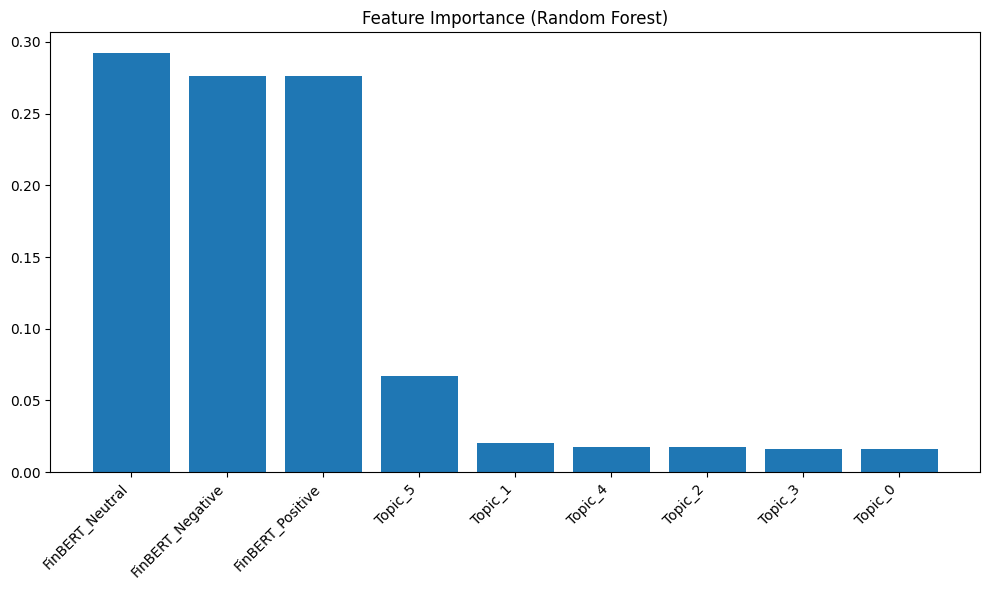

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Test on AVG Price Change

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features
X = pd.concat([
    merged_df[['FinBERT_Positive', 'FinBERT_Neutral', 'FinBERT_Negative']],
    pd.get_dummies(merged_df['USE_Topic'], prefix='Topic')
], axis=1)

# Target
y = merged_df['Avg_Price_Change']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Evaluate
y_pred = reg.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: -0.07192320887399406
RMSE: 0.0604647756278029


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("R²:", linreg.score(X_test, y_test))

R²: -0.052448146511757


Test on if price moves up or down

In [ ]:
merged_df['Price_Up'] = merged_df['Price_Change_1d'].apply(
    lambda x: 1 if x > 0.01 else 0 if x < -0.01 else np.nan
)
merged_df = merged_df.dropna(subset=['Price_Up'])

In [ ]:
use_topic_dummies = pd.get_dummies(merged_df['USE_Topic'], prefix='Topic')
X = pd.concat([
    merged_df[['FinBERT_Positive', 'FinBERT_Neutral', 'FinBERT_Negative']],
    use_topic_dummies
], axis=1)

y = merged_df['Price_Up'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53        36
           1       0.51      0.72      0.60        29

    accuracy                           0.57        65
   macro avg       0.59      0.58      0.57        65
weighted avg       0.60      0.57      0.56        65



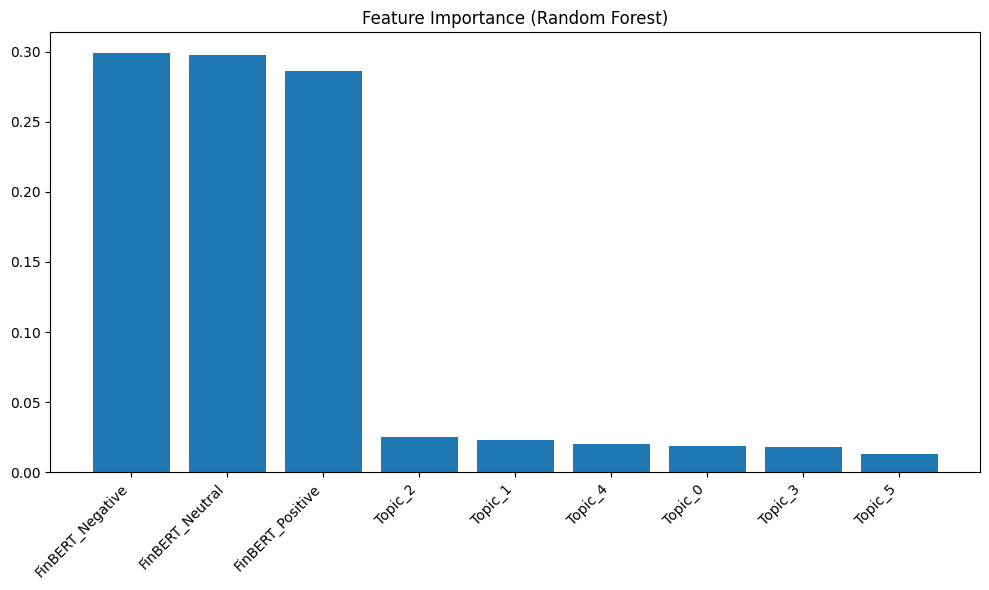

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Test using only sentiment scores

In [ ]:
# Define features (sentiment only)
X = merged_df[['FinBERT_Positive', 'FinBERT_Neutral', 'FinBERT_Negative']]

# Define target (adjust for your use case — either Price_Up or High_Volatility)
y = merged_df['Price_Up'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        36
           1       0.53      0.62      0.57        29

    accuracy                           0.58        65
   macro avg       0.59      0.59      0.58        65
weighted avg       0.59      0.58      0.59        65



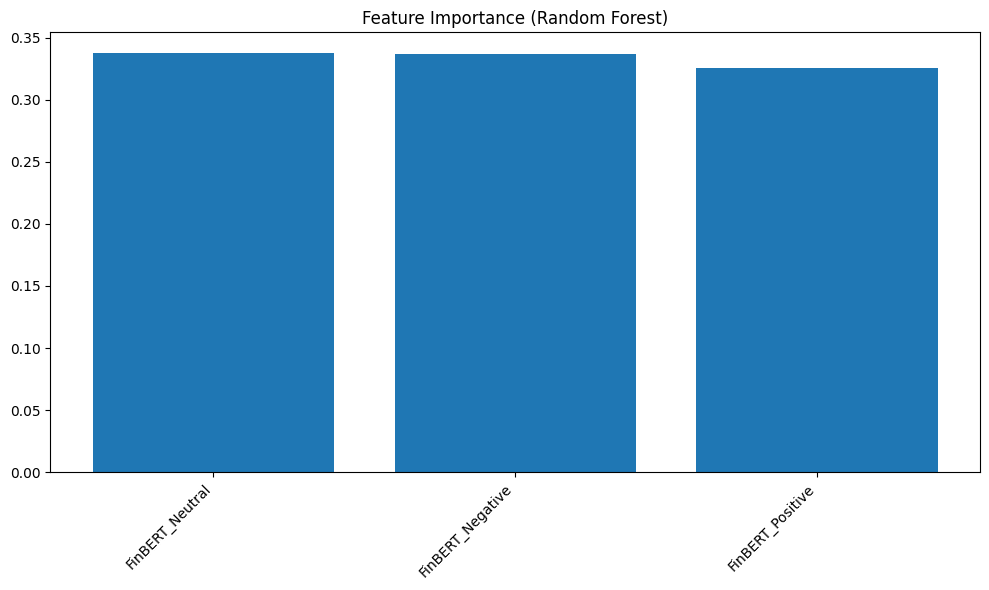

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Define features (sentiment only)
X = merged_df[['FinBERT_Positive', 'FinBERT_Neutral', 'FinBERT_Negative']]

# Define target (adjust for your use case — either Price_Up or High_Volatility)
y = merged_df['High_Volatility'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        33
           1       0.48      0.47      0.48        32

    accuracy                           0.49        65
   macro avg       0.49      0.49      0.49        65
weighted avg       0.49      0.49      0.49        65



In [ ]:
merged_df.head()

,Company_Name,Earnings_Call_Date,Text,Stock_Ticker,Country,Sector,Industry,USE_Topic,LDA_Topic_0,LDA_Topic_1,LDA_Topic_2,LDA_Topic_3,FinBERT_Positive,FinBERT_Neutral,FinBERT_Negative,FinBERT_Polarity,Price_Change_1d,Volatility_2d,Avg_Price_Change,High_Volatility
0,AbbVie Inc.,2017-07-28,"Thanks, Mike\nWe are very pleased with our sec...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations,0,0.021780,0.934658,0.021785,0.021778,0.956897,0.022364,0.020739,0.936157,-0.025372,0.010074,-0.028177,False
1,Abbott Laboratories,2017-10-18,"Okay\nToday, we reported ongoing earnings per ...",ABT,United States,Health Care,Biotechnology: Pharmaceutical Preparations,4,0.012949,0.961147,0.012953,0.012951,0.955871,0.020281,0.023848,0.932023,0.017072,0.001124,0.022818,False
2,A.O. Smith Corp,2017-07-26,"Thanks, Ajita\nSales for the second quarter of...",AOS,United States,Consumer Discretionary,Consumer Electronics/Appliances,0,0.021935,0.934190,0.021939,0.021935,0.958422,0.019889,0.021688,0.936734,-0.017458,0.006816,-0.021473,False
3,3M Company,2017-04-25,"Thanks, Inge, and good morning, everyone\nI'll...",MMM,United States,Health Care,Medical/Dental Instruments,2,0.015857,0.952428,0.015859,0.015857,0.743829,0.232851,0.023319,0.720510,0.003965,0.003909,0.016208,False
4,AbbVie Inc.,2017-10-27,"Thank you, Rick\nIn order to allow time for ou...",ABBV,United States,Health Care,Biotechnology: Pharmaceutical Preparations,3,0.019758,0.940741,0.019752,0.019749,0.944243,0.013521,0.042236,0.902007,0.015632,0.001942,0.000439,False
